In [1]:
# Pandas package

!pip install pandas
import pandas as pd

# Missingno package installation

!pip install missingno
import missingno as msno

# Matplotlib package installation

!pip install matplotlib
import matplotlib.pyplot as plt

# Seaborn package installation

!pip install seaborn
import seaborn as sns

# Numpy Installation

!pip install numpy
import numpy as np



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df_raw = pd.read_csv(r"C:\Users\Blesso\Desktop\Python Learning\DS\Capstone Projects\Project 4\Dataset\new_train_sample.csv")
df_raw

,Unnamed: 0,Id,OrgId,IncidentId,AlertId,Timestamp,DetectorId,AlertTitle,Category,MitreTechniques,...,ResourceType,Roles,OSFamily,OSVersion,AntispamDirection,SuspicionLevel,LastVerdict,CountryCode,State,City
0,5172780,1709396985476,26,18583,687462,2024-06-06T05:56:47.000Z,31,813,Malware,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Malicious,242,1445,10630
1,8470561,927712939180,33,5065,3990,2024-06-03T10:45:09.000Z,38,25,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
2,5897583,1090921697002,201,150787,807590,2024-06-13T03:36:40.000Z,419,444,Execution,T1047;T1059;T1053;T1569;T1059.001;T1053.002;T1...,...,NaN,Destination,5,66,NaN,NaN,NaN,242,1445,10630
3,3288552,1434519079555,204,108287,28575,2024-06-08T16:54:57.000Z,44,1233,SuspiciousActivity,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4,4060961,1005022347708,54,528202,1458226,2024-06-09T02:48:01.000Z,102,58829,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,3272416,103079215470,142,93987,15739,2024-06-10T10:25:17.000Z,112,7836,Exfiltration,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758414,6701254,1683627184337,36,1001,257479,2024-06-11T19:30:52.000Z,2,2,CommandAndControl,NaN,...,NaN,NaN,5,66,NaN,Suspicious,Suspicious,242,1445,10630
4758415,5665090,1597727836318,851,31194,1518250,2024-06-09T04:27:41.000Z,1,1,InitialAccess,T1566.002,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630
4758416,1421470,137438957239,12,2419,1203,2024-05-21T23:01:11.000Z,16,1334,Impact,NaN,...,NaN,NaN,5,66,NaN,NaN,NaN,242,1445,10630


In [3]:
df_raw.columns

Index(['Unnamed: 0', 'Id', 'OrgId', 'IncidentId', 'AlertId', 'Timestamp',
       'DetectorId', 'AlertTitle', 'Category', 'MitreTechniques',
       'IncidentGrade', 'ActionGrouped', 'ActionGranular', 'EntityType',
       'EvidenceRole', 'DeviceId', 'Sha256', 'IpAddress', 'Url', 'AccountSid',
       'AccountUpn', 'AccountObjectId', 'AccountName', 'DeviceName',
       'NetworkMessageId', 'EmailClusterId', 'RegistryKey',
       'RegistryValueName', 'RegistryValueData', 'ApplicationId',
       'ApplicationName', 'OAuthApplicationId', 'ThreatFamily', 'FileName',
       'FolderPath', 'ResourceIdName', 'ResourceType', 'Roles', 'OSFamily',
       'OSVersion', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
       'CountryCode', 'State', 'City'],
      dtype='object')

In [4]:
df = df_raw[['AlertTitle', 'Category',
'ActionGrouped', 'ActionGranular', 'IncidentGrade',
'EntityType', 'EvidenceRole', 'Timestamp',
'ThreatFamily', 'Roles', 'ResourceType',
'OSFamily', 'OSVersion',
'AntispamDirection', 'SuspicionLevel', 'LastVerdict',
'CountryCode', 'State', 'City']]

df_numerical = df_raw[['AlertTitle', 'OSFamily', 'OSVersion', 'CountryCode', 'State', 'City']]

df_categorical = df_raw[['Category', 'ActionGrouped', 'ActionGranular', 'EntityType', 'EvidenceRole', 'ThreatFamily', 'ResourceType', 'Roles', 'AntispamDirection', 'SuspicionLevel', 'LastVerdict']]

Important Feature Selection

In [5]:
from sklearn.feature_selection import mutual_info_classif
from scipy.stats import spearmanr

# Encode target variable
df_raw['IncidentGrade'] = df_raw['IncidentGrade'].astype('category').cat.codes

# ✅ **Categorical Feature Importance (Mutual Information)**
df_categorical_encoded = df_categorical.apply(lambda x: x.astype('category').cat.codes)  # Encode categorical columns
mi_scores = mutual_info_classif(df_categorical_encoded, df_raw['IncidentGrade'], discrete_features=True)
mi_scores = pd.DataFrame({'Feature': df_categorical.columns, 'Mutual Information': mi_scores})
mi_scores = mi_scores.sort_values(by='Mutual Information', ascending=False)

#print("\n📊 Mutual Information for Categorical Features:\n", mi_scores)
mi_scores

,Feature,Mutual Information
3,EntityType,0.111906
0,Category,0.106953
2,ActionGranular,0.032126
1,ActionGrouped,0.032019
10,LastVerdict,0.017484
4,EvidenceRole,0.017242
9,SuspicionLevel,0.014185
5,ThreatFamily,0.003921
7,Roles,0.002731
8,AntispamDirection,0.000746


In [6]:
from scipy.stats import spearmanr
from sklearn.preprocessing import LabelEncoder

# Encode the target variable "IncidentGrade"
le = LabelEncoder()
df_raw['IncidentGrade_encoded'] = le.fit_transform(df_raw['IncidentGrade'])

# Compute Spearman correlation
spearman_corr = df_numerical.corrwith(df_raw['IncidentGrade_encoded'], method='spearman')

# Display results sorted by absolute correlation value
print("Spearman Correlation with IncidentGrade:\n")
print(spearman_corr.sort_values(ascending=False))


Spearman Correlation with IncidentGrade:

OSFamily       0.064610
OSVersion      0.064605
State         -0.265451
City          -0.265757
CountryCode   -0.289659
AlertTitle    -0.356069
dtype: float64


In [7]:
df.columns

Index(['AlertTitle', 'Category', 'ActionGrouped', 'ActionGranular',
       'IncidentGrade', 'EntityType', 'EvidenceRole', 'Timestamp',
       'ThreatFamily', 'Roles', 'ResourceType', 'OSFamily', 'OSVersion',
       'AntispamDirection', 'SuspicionLevel', 'LastVerdict', 'CountryCode',
       'State', 'City'],
      dtype='object')

Missing Value Treatment

In [8]:
df.isnull().sum()

AlertTitle                 0
Category                   0
ActionGrouped        4730205
ActionGranular       4730205
IncidentGrade          25775
EntityType                 0
EvidenceRole               0
Timestamp                  0
ThreatFamily         4721038
Roles                4649117
ResourceType         4754863
OSFamily                   0
OSVersion                  0
AntispamDirection    4669846
SuspicionLevel       4037145
LastVerdict          3642221
CountryCode                0
State                      0
City                       0
dtype: int64

Finding the Missing Percentage

In [9]:
column_name = 'ActionGranular'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'ActionGranular': 99.41%


In [10]:
column_name = 'ActionGrouped'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'ActionGrouped': 99.41%


In [11]:
column_name = 'ThreatFamily'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'ThreatFamily': 99.21%


In [12]:
column_name = 'Roles'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'Roles': 97.70%


In [13]:
column_name = 'ResourceType'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'ResourceType': 99.93%


In [14]:
column_name = 'AntispamDirection'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'AntispamDirection': 98.14%


In [15]:
column_name = 'SuspicionLevel'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'SuspicionLevel': 84.84%


In [16]:
column_name = 'LastVerdict'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'LastVerdict': 76.54%


In [17]:
column_name = 'IncidentGrade'

missing_percentage = df[column_name].isnull().sum() / len(df) * 100

print(f"Percentage of missing values in '{column_name}': {missing_percentage:.2f}%")


Percentage of missing values in 'IncidentGrade': 0.54%


Drop the columns

In [18]:
df.drop(columns=['ActionGranular', 'ActionGrouped', 'ThreatFamily', 'ResourceType', 'AntispamDirection', 'Roles', 'SuspicionLevel', 'LastVerdict'], inplace=True)

C:\Users\Blesso\AppData\Local\Temp\ipykernel_7252\2708678567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ActionGranular', 'ActionGrouped', 'ThreatFamily', 'ResourceType', 'AntispamDirection', 'Roles', 'SuspicionLevel', 'LastVerdict'], inplace=True)


In [19]:
df

,AlertTitle,Category,IncidentGrade,EntityType,EvidenceRole,Timestamp,OSFamily,OSVersion,CountryCode,State,City
0,813,Malware,BenignPositive,File,Related,2024-06-06T05:56:47.000Z,5,66,242,1445,10630
1,25,Impact,BenignPositive,Machine,Impacted,2024-06-03T10:45:09.000Z,5,66,242,1445,10630
2,444,Execution,BenignPositive,Machine,Impacted,2024-06-13T03:36:40.000Z,5,66,242,1445,10630
3,1233,SuspiciousActivity,TruePositive,File,Related,2024-06-08T16:54:57.000Z,5,66,242,1445,10630
4,58829,Exfiltration,BenignPositive,File,Impacted,2024-06-09T02:48:01.000Z,5,66,242,1445,10630
...,...,...,...,...,...,...,...,...,...,...,...
4758413,7836,Exfiltration,FalsePositive,MailMessage,Impacted,2024-06-10T10:25:17.000Z,5,66,242,1445,10630
4758414,2,CommandAndControl,FalsePositive,User,Impacted,2024-06-11T19:30:52.000Z,5,66,242,1445,10630
4758415,1,InitialAccess,BenignPositive,MailMessage,Related,2024-06-09T04:27:41.000Z,5,66,242,1445,10630
4758416,1334,Impact,BenignPositive,Ip,Related,2024-05-21T23:01:11.000Z,5,66,242,1445,10630


EDA

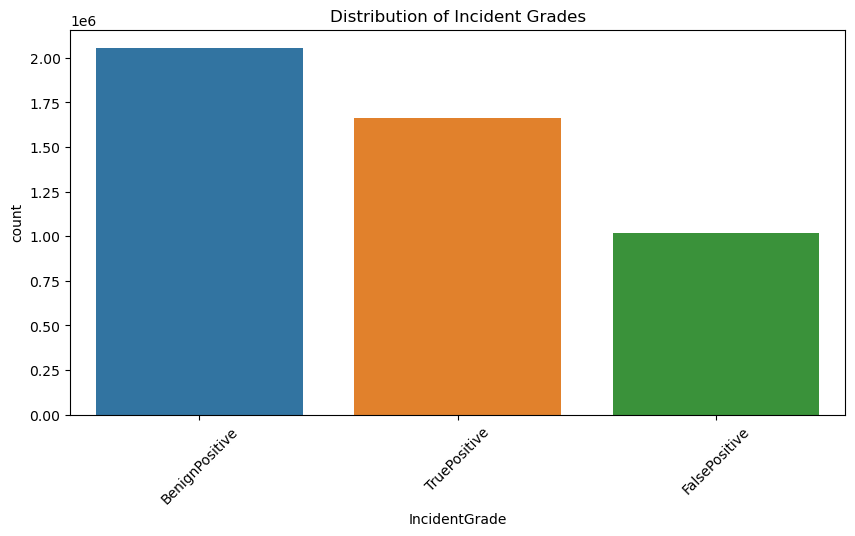

In [20]:
# Univariate Analysis - Count plots for categorical columns
plt.figure(figsize=(10, 5))
sns.countplot(x='IncidentGrade', data=df, order=df['IncidentGrade'].value_counts().index)
plt.title("Distribution of Incident Grades")
plt.xticks(rotation=45)
plt.show()

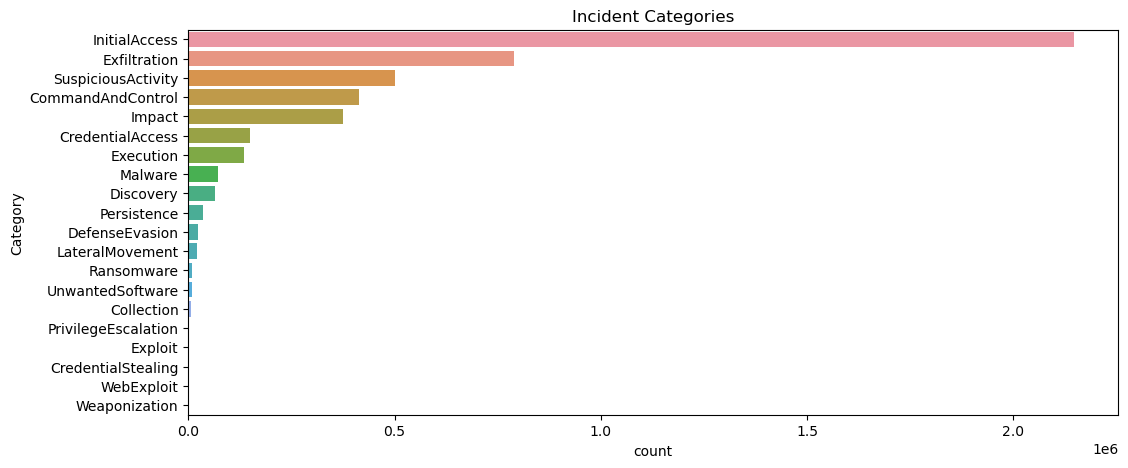

In [21]:
# Count plot for Category

plt.figure(figsize=(12, 5))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title("Incident Categories")
plt.show()

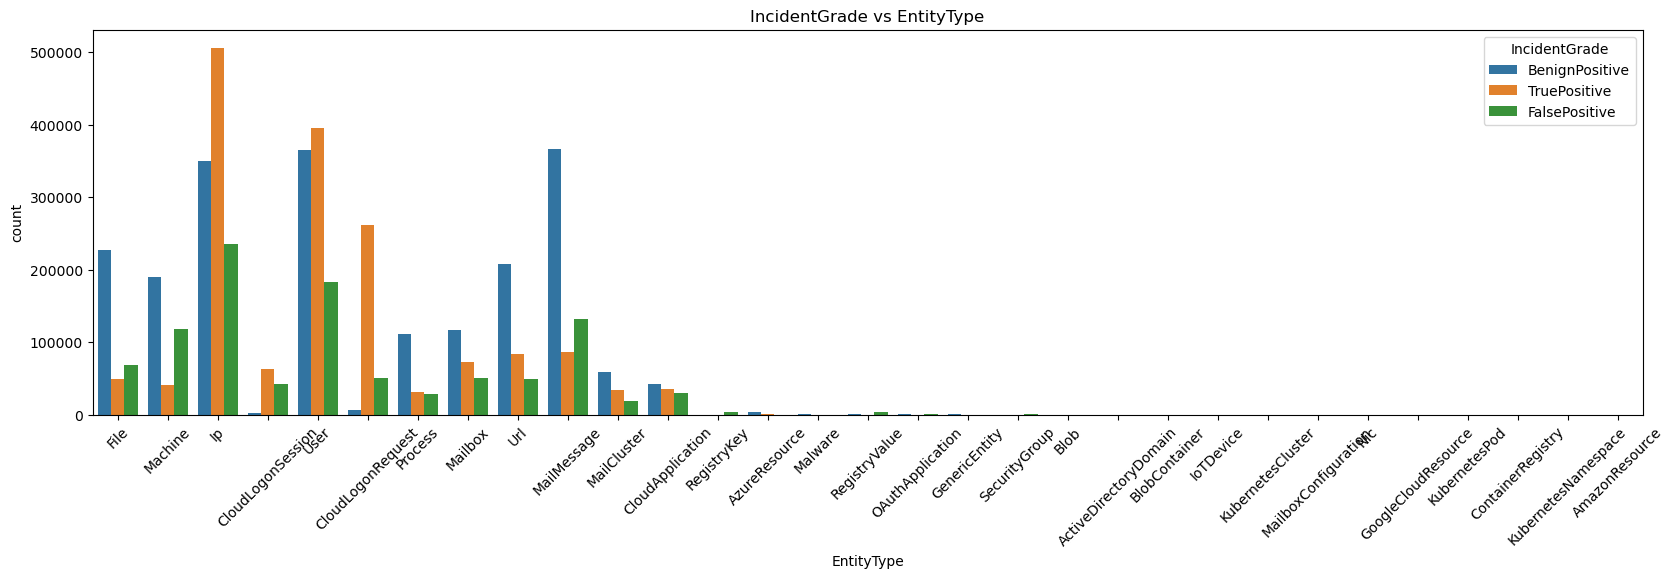

In [22]:
# Bivariate Analysis - IncidentGrade vs Categorical Columns

plt.figure(figsize=(20, 5))
sns.countplot(x='EntityType', hue='IncidentGrade', data=df)
plt.title("IncidentGrade vs EntityType")
plt.xticks(rotation=45)
plt.show()

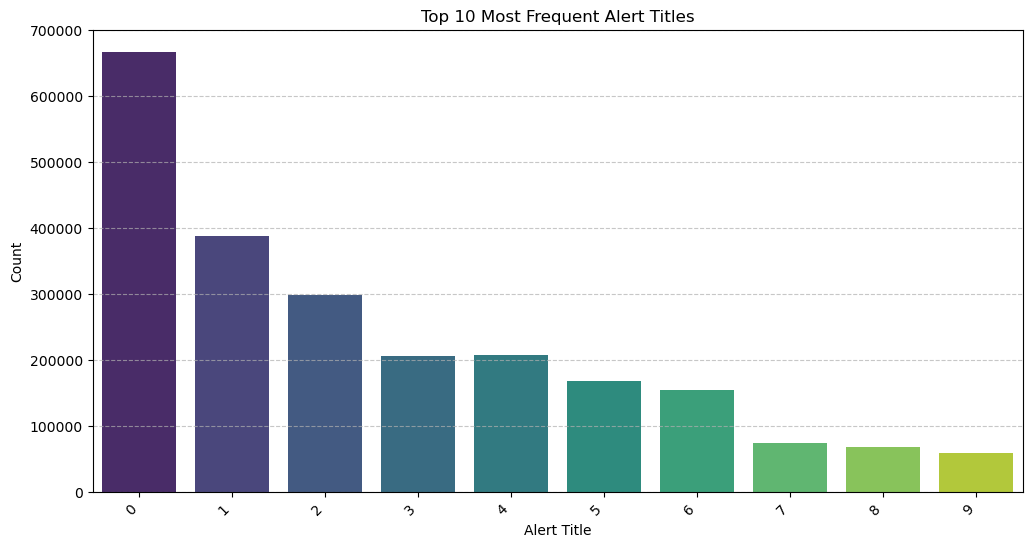

In [23]:

# Get top 10 most frequent AlertTitles

top_alerts = df['AlertTitle'].value_counts().head(10)

# Plot the top 10 alert titles
plt.figure(figsize=(12, 6))
sns.barplot(x=top_alerts.index, y=top_alerts.values, palette='viridis')

plt.title("Top 10 Most Frequent Alert Titles")
plt.xlabel("Alert Title")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\Blesso\AppData\Local\Temp\ipykernel_7252\3151893737.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
C:\Users\Blesso\AppData\Local\Temp\ipykernel_7252\3151893737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HourOfDay'] = df['Timestamp'].dt.hour


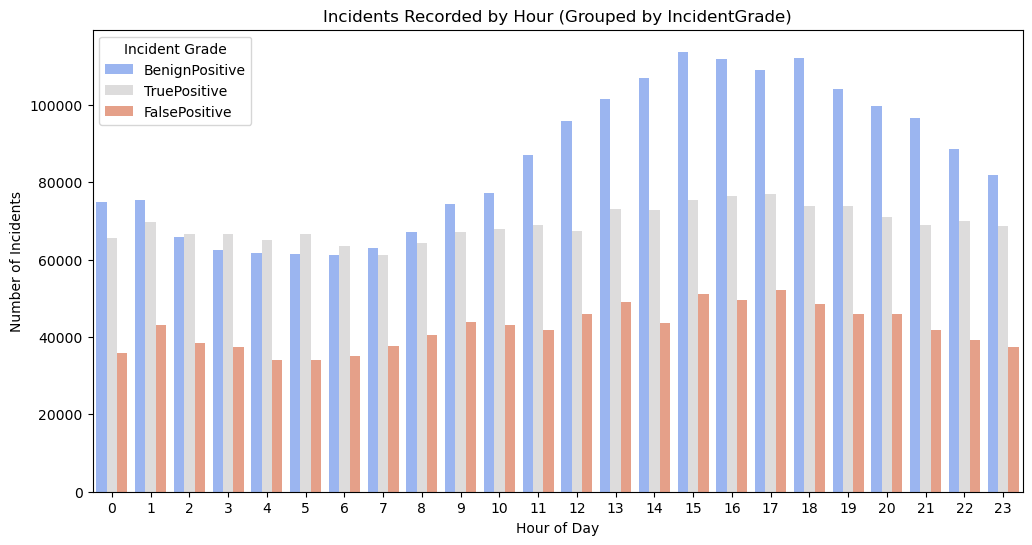

In [24]:
# Extract hour from Timestamp

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['HourOfDay'] = df['Timestamp'].dt.hour

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='HourOfDay', hue='IncidentGrade', palette='coolwarm')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Incidents')
plt.title('Incidents Recorded by Hour (Grouped by IncidentGrade)')
plt.legend(title='Incident Grade')
plt.xticks(rotation=0)
plt.show()

C:\Users\Blesso\AppData\Local\Temp\ipykernel_1300\2109463339.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DayOfWeek'] = df['Timestamp'].dt.day_name()


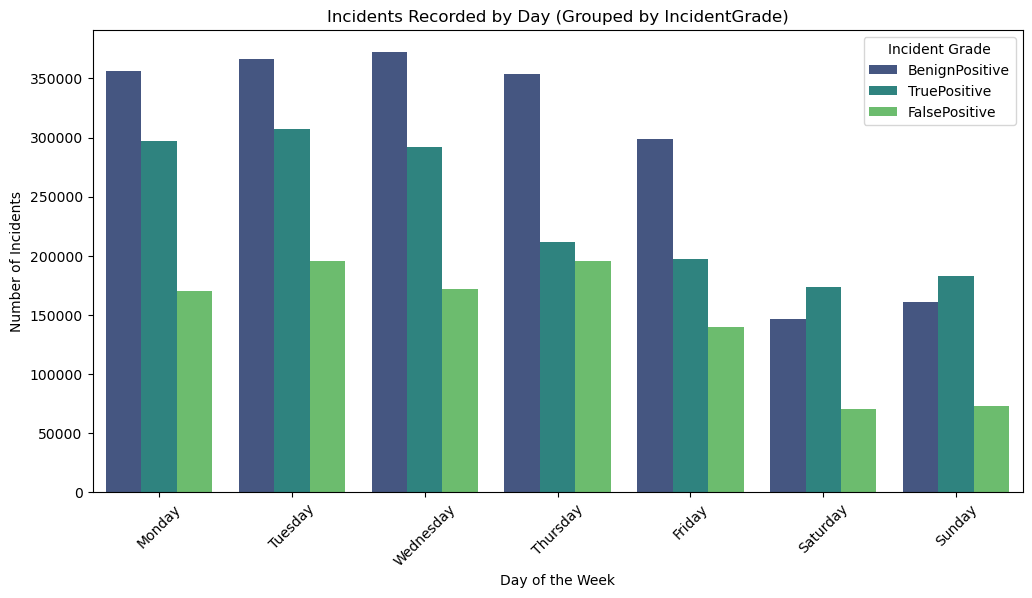

In [25]:
# Extract Day of the Week
df['DayOfWeek'] = df['Timestamp'].dt.day_name()

# Define order (so they don't appear randomly)
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='DayOfWeek', hue='IncidentGrade', order=order, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.title('Incidents Recorded by Day (Grouped by IncidentGrade)')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45)
plt.show()

C:\Users\Blesso\AppData\Local\Temp\ipykernel_7252\1607064977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Month'] = df['Timestamp'].dt.month_name()


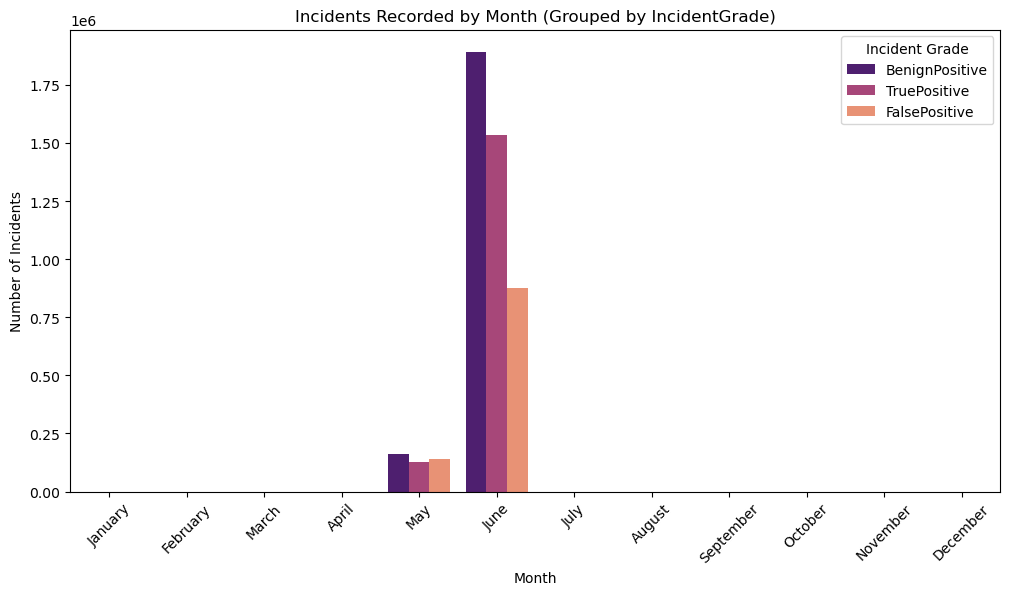

In [25]:
# Extract month
df['Month'] = df['Timestamp'].dt.month_name()

# Define month order for proper visualization
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

# Plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Month', hue='IncidentGrade', order=month_order, palette='magma')
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Incidents Recorded by Month (Grouped by IncidentGrade)')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45)
plt.show()


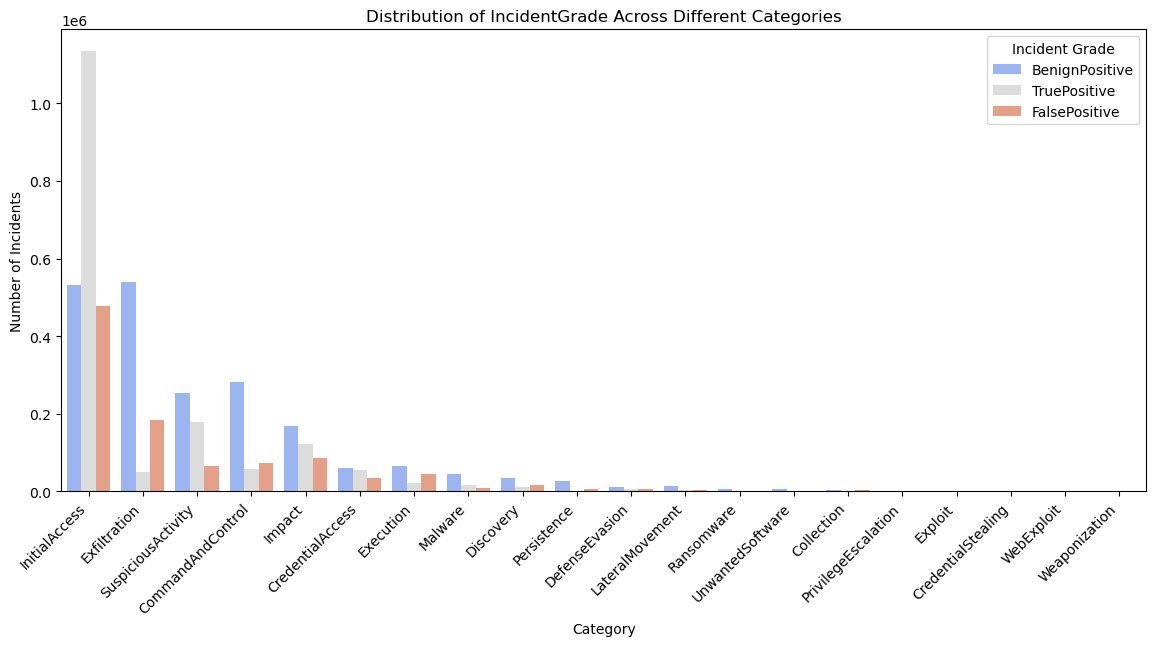

In [26]:
# IncidentGrade vs Category

plt.figure(figsize=(14, 6))
sns.countplot(data=df, x='Category', hue='IncidentGrade', palette='coolwarm', order=df['Category'].value_counts().index)

plt.xlabel('Category')
plt.ylabel('Number of Incidents')
plt.title('Distribution of IncidentGrade Across Different Categories')
plt.legend(title='Incident Grade')
plt.xticks(rotation=45, ha='right')
plt.show()


Missing Value Treatment

In [27]:
df.isnull().sum()

AlertTitle           0
Category             0
IncidentGrade    25775
EntityType           0
EvidenceRole         0
Timestamp            0
OSFamily             0
OSVersion            0
CountryCode          0
State                0
City                 0
HourOfDay            0
Month                0
dtype: int64

In [28]:
# Filling the missing values of "IncidentGrade" column with mode technique

df['IncidentGrade'] = df['IncidentGrade'].fillna('BenignPositive')

C:\Users\Blesso\AppData\Local\Temp\ipykernel_7252\1689834327.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IncidentGrade'] = df['IncidentGrade'].fillna('BenignPositive')


In [29]:
df.isnull().sum()

AlertTitle       0
Category         0
IncidentGrade    0
EntityType       0
EvidenceRole     0
Timestamp        0
OSFamily         0
OSVersion        0
CountryCode      0
State            0
City             0
HourOfDay        0
Month            0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4758418 entries, 0 to 4758417
Data columns (total 13 columns):
 #   Column         Dtype              
---  ------         -----              
 0   AlertTitle     int64              
 1   Category       object             
 2   IncidentGrade  object             
 3   EntityType     object             
 4   EvidenceRole   object             
 5   Timestamp      datetime64[ns, UTC]
 6   OSFamily       int64              
 7   OSVersion      int64              
 8   CountryCode    int64              
 9   State          int64              
 10  City           int64              
 11  HourOfDay      int32              
 12  Month          object             
dtypes: datetime64[ns, UTC](1), int32(1), int64(6), object(5)
memory usage: 453.8+ MB


Encoding

In [31]:
# Install the package

!pip install category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
!pip install --upgrade category_encoders


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [33]:
# IncidentGrade

# Define the mapping
incident_grade_mapping = {'FalsePositive': 0, 'BenignPositive': 1, 'TruePositive': 2}

# Apply the mapping
df['IncidentGrade'] = df['IncidentGrade'].map(incident_grade_mapping)

#df = pd.get_dummies(df, columns=['IncidentGrade'], prefix='IncidentGrade')

C:\Users\Blesso\AppData\Local\Temp\ipykernel_7252\3667380571.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['IncidentGrade'] = df['IncidentGrade'].map(incident_grade_mapping)


In [34]:
# Frequency Encoding for 'AlertTitle'

alert_title_counts = df['AlertTitle'].value_counts()
df['AlertTitle'] = df['AlertTitle'].map(alert_title_counts)

# Check the transformed column
df[['AlertTitle']].head(100)


C:\Users\Blesso\AppData\Local\Temp\ipykernel_7252\2335295025.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AlertTitle'] = df['AlertTitle'].map(alert_title_counts)


,AlertTitle
0,315
1,20210
2,663
3,101
4,2
...,...
95,206642
96,666728
97,666728
98,52


In [35]:
# Category

df = pd.get_dummies(df, columns=['Category'], prefix='Category', dtype=int)


In [36]:
# EntityType

df = pd.get_dummies(df, columns=['EntityType'], prefix='EntityType', dtype=int)

In [37]:
# One-Hot Encoding for OSFamily

df = pd.get_dummies(df, columns=['OSFamily'], dtype=int)


In [38]:
# One hot encoding for "EvidenceRole" column

df = pd.get_dummies(df, columns=['EvidenceRole'], prefix='EvidenceRole', dtype=int)

In [39]:
# Frequency encoding for OSVersion

freq_map = df['OSVersion'].value_counts().to_dict()
df['OSVersion'] = df['OSVersion'].map(freq_map)


In [40]:
# Frequency encoding based on training data

country_counts = df['CountryCode'].value_counts()
state_counts = df['State'].value_counts()
city_counts = df['City'].value_counts()

# Apply encoding in training data
df['CountryCode'] = df['CountryCode'].map(country_counts)
df['State'] = df['State'].map(state_counts)
df['City'] = df['City'].map(city_counts)


In [41]:
df

,AlertTitle,IncidentGrade,Timestamp,OSVersion,CountryCode,State,City,HourOfDay,Month,Category_Collection,...,EntityType_Url,EntityType_User,OSFamily_0,OSFamily_1,OSFamily_2,OSFamily_3,OSFamily_4,OSFamily_5,EvidenceRole_Impacted,EvidenceRole_Related
0,315,1,2024-06-06 05:56:47+00:00,4661382,4383817,4442124,4441811,5,June,0,...,0,0,0,0,0,0,0,1,0,1
1,20210,1,2024-06-03 10:45:09+00:00,4661382,4383817,4442124,4441811,10,June,0,...,0,0,0,0,0,0,0,1,1,0
2,663,1,2024-06-13 03:36:40+00:00,4661382,4383817,4442124,4441811,3,June,0,...,0,0,0,0,0,0,0,1,1,0
3,101,2,2024-06-08 16:54:57+00:00,4661382,4383817,4442124,4441811,16,June,0,...,0,0,0,0,0,0,0,1,0,1
4,2,1,2024-06-09 02:48:01+00:00,4661382,4383817,4442124,4441811,2,June,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4758413,29,0,2024-06-10 10:25:17+00:00,4661382,4383817,4442124,4441811,10,June,0,...,0,0,0,0,0,0,0,1,1,0
4758414,298559,0,2024-06-11 19:30:52+00:00,4661382,4383817,4442124,4441811,19,June,0,...,0,1,0,0,0,0,0,1,1,0
4758415,387327,1,2024-06-09 04:27:41+00:00,4661382,4383817,4442124,4441811,4,June,0,...,0,0,0,0,0,0,0,1,0,1
4758416,262,1,2024-05-21 23:01:11+00:00,4661382,4383817,4442124,4441811,23,May,0,...,0,0,0,0,0,0,0,1,0,1


In [42]:
df.columns

Index(['AlertTitle', 'IncidentGrade', 'Timestamp', 'OSVersion', 'CountryCode',
       'State', 'City', 'HourOfDay', 'Month', 'Category_Collection',
       'Category_CommandAndControl', 'Category_CredentialAccess',
       'Category_CredentialStealing', 'Category_DefenseEvasion',
       'Category_Discovery', 'Category_Execution', 'Category_Exfiltration',
       'Category_Exploit', 'Category_Impact', 'Category_InitialAccess',
       'Category_LateralMovement', 'Category_Malware', 'Category_Persistence',
       'Category_PrivilegeEscalation', 'Category_Ransomware',
       'Category_SuspiciousActivity', 'Category_UnwantedSoftware',
       'Category_Weaponization', 'Category_WebExploit',
       'EntityType_ActiveDirectoryDomain', 'EntityType_AmazonResource',
       'EntityType_AzureResource', 'EntityType_Blob',
       'EntityType_BlobContainer', 'EntityType_CloudApplication',
       'EntityType_CloudLogonRequest', 'EntityType_CloudLogonSession',
       'EntityType_ContainerRegistry', 'Entity

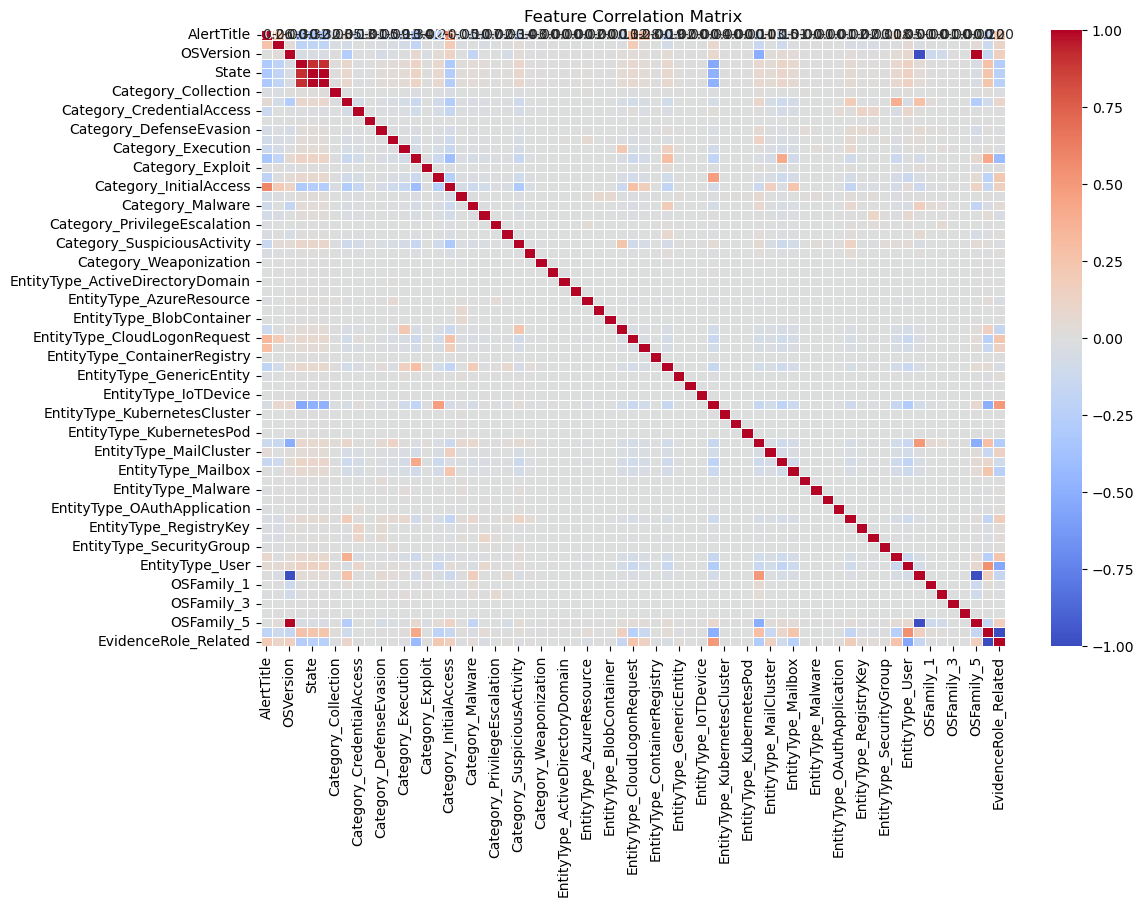

In [43]:
df.drop(columns=['HourOfDay', 'Month', 'Timestamp'], inplace=True)

# Compute correlation matrix
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [44]:
# Find pairs of highly correlated features (|corr| > 0.85)
threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)

# Exclude self-correlation (diagonal values = 1)
corr_pairs = corr_pairs[corr_pairs < 1]

# Display highly correlated feature pairs
high_corr_features = corr_pairs[corr_pairs > threshold]
print(high_corr_features)

EvidenceRole_Impacted  EvidenceRole_Related     1.000000
EvidenceRole_Related   EvidenceRole_Impacted    1.000000
OSVersion              OSFamily_5               0.999977
OSFamily_5             OSVersion                0.999977
State                  City                     0.999448
City                   State                    0.999448
OSFamily_0             OSFamily_5               0.988882
OSFamily_5             OSFamily_0               0.988882
OSFamily_0             OSVersion                0.988452
OSVersion              OSFamily_0               0.988452
State                  CountryCode              0.912138
CountryCode            State                    0.912138
City                   CountryCode              0.912100
CountryCode            City                     0.912100
dtype: float64


In [45]:
# Working

feature = df[['AlertTitle', 'OSVersion', 'CountryCode',
       'State', 'City', 'Category_Collection', 'Category_CommandAndControl',
       'Category_CredentialAccess', 'Category_CredentialStealing',
       'Category_DefenseEvasion', 'Category_Discovery', 'Category_Execution',
       'Category_Exfiltration', 'Category_Exploit', 'Category_Impact',
       'Category_InitialAccess', 'Category_LateralMovement',
       'Category_Malware', 'Category_Persistence',
       'Category_PrivilegeEscalation', 'Category_Ransomware',
       'Category_SuspiciousActivity', 'Category_UnwantedSoftware',
       'Category_WebExploit',
       'EntityType_ActiveDirectoryDomain', 'EntityType_AmazonResource',
       'EntityType_AzureResource', 'EntityType_Blob',
       'EntityType_BlobContainer', 'EntityType_CloudApplication',
       'EntityType_CloudLogonRequest', 'EntityType_CloudLogonSession',
       'EntityType_File',
       'EntityType_GenericEntity', 'EntityType_GoogleCloudResource',
       'EntityType_IoTDevice', 'EntityType_Ip', 'EntityType_KubernetesCluster',
       'EntityType_KubernetesNamespace',
       'EntityType_Machine', 'EntityType_MailCluster',
       'EntityType_MailMessage', 'EntityType_Mailbox',
       'EntityType_MailboxConfiguration', 'EntityType_Malware',
       'EntityType_Nic', 'EntityType_OAuthApplication', 'EntityType_Process',
       'EntityType_RegistryKey', 'EntityType_RegistryValue',
       'EntityType_SecurityGroup', 'EntityType_Url', 'EntityType_User',
       'OSFamily_0', 'OSFamily_1', 'OSFamily_2', 'OSFamily_3',
       'OSFamily_5', 'EvidenceRole_Impacted', 'EvidenceRole_Related']]
target = df['IncidentGrade']

In [46]:
target.value_counts()

IncidentGrade
1    2080549
2    1662087
0    1015782
Name: count, dtype: int64

Feature Importance

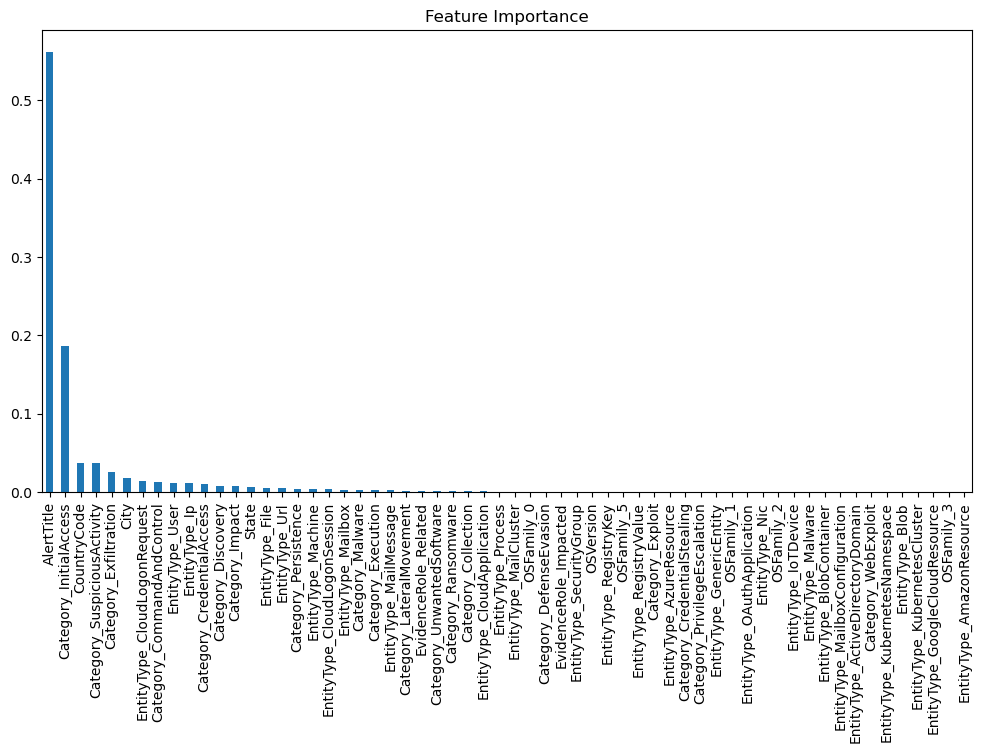

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(feature, target)

# Get feature importance
importance = pd.Series(model.feature_importances_, index=feature.columns)
importance.sort_values(ascending=False).plot(kind='bar', figsize=(12,6))
plt.title("Feature Importance")
plt.show()


Train Validation Split

In [66]:

from sklearn.model_selection import StratifiedShuffleSplit

# Initialize StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Perform the stratified split
for train_idx, val_idx in stratified_split.split(feature, target):
    X_train, X_val = feature.iloc[train_idx], feature.iloc[val_idx]
    y_train, y_val = target.iloc[train_idx], target.iloc[val_idx]

# Display the shape of Train and Validation sets
print(f"X_train Shape: {X_train.shape}, y_train Shape: {y_train.shape}")
print(f"X_val Shape: {X_val.shape}, y_val Shape: {y_val.shape}")

# Verify class distribution in Train and Validation sets
print("\nTrain Class Distribution:\n", y_train.value_counts(normalize=True))
print("\nValidation Class Distribution:\n", y_val.value_counts(normalize=True))


X_train Shape: (3806734, 60), y_train Shape: (3806734,)
X_val Shape: (951684, 60), y_val Shape: (951684,)

Train Class Distribution:
 IncidentGrade
1    0.437235
2    0.349294
0    0.213471
Name: proportion, dtype: float64

Validation Class Distribution:
 IncidentGrade
1    0.437235
2    0.349295
0    0.213470
Name: proportion, dtype: float64


Training the Model

## Decision Tree Classifier

In [70]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
#clf = DecisionTreeClassifier(random_state=42)

# Initialize Decision Tree with automatic class weight balancing
clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Train the model on training data
clf.fit(X_train, y_train)
#clf.fit(X_train_resampled, y_train_resampled)

# Predictions on validation set
y_pred = clf.predict(X_val)


In [71]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Calculate Macro F1-Score, Precision, and Recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')
# Print the classification report
print("Classification Report:\n", classification_report(y_val, y_pred))
print("\nMacro F1-Score:", macro_f1)
print("Precision:", precision)
print("Recall:", recall)

Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59    203156
           1       0.75      0.80      0.77    416110
           2       0.81      0.68      0.74    332418

    accuracy                           0.72    951684
   macro avg       0.70      0.70      0.70    951684
weighted avg       0.73      0.72      0.72    951684


Macro F1-Score: 0.7001881147938777
Precision: 0.7042667942187446
Recall: 0.701327102044414


Target Class Balancing (SMOTE)

In [30]:
# SMOTE (Minority class)

#from imblearn.over_sampling import SMOTE

# Apply SMOTE (Oversample class "0" to 1,662,087 or 2,080,549)
#smote = SMOTE(sampling_strategy={0: 1662087}, random_state=42)  # Change to 2080549 for full balance
#X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [51]:
#y_train_resampled.value_counts()

In [ ]:
# Step size smote

#from imblearn.over_sampling import SMOTE
#from collections import Counter

#target_final = 1662087  # Final target for class 0
#increment = 100000       # Step size (adjust as needed)

#X_resampled, y_resampled = X_train.copy(), y_train.copy()  # Create a copy to avoid modifying the original data

#while Counter(y_resampled)[0] < target_final:
#    smote = SMOTE(sampling_strategy={0: min(Counter(y_resampled)[0] + increment, target_final)}, random_state=42)
#   X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)
#    print("Current class distribution:", Counter(y_resampled))  # Monitor progress


In [ ]:
# SMOTE via KMeans clustering

#from imblearn.over_sampling import KMeansSMOTE

#kmeans_smote = KMeansSMOTE(sampling_strategy={0: 1662087}, random_state=42, k_neighbors=3)
#X_resampled, y_resampled = kmeans_smote.fit_resample(X_train, y_train)


In [ ]:
#y_train_resampled.value_counts()

Hyperparameter Optimization (RandomizedSearchCV)

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter grid
param_dist = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["auto", "sqrt", "log2", None]
}

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=clf,
    param_distributions=param_dist,
    n_iter=20,  # Number of random combinations to try
    scoring="f1_macro",  # Optimize for Macro F1-Score
    cv=5,  # 5-fold cross-validation
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print("Best Hyperparameters:", random_search.best_params_)

# Train the model using the best parameters
best_clf = random_search.best_estimator_

# Predictions on validation set
y_pred = best_clf.predict(X_val)

from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Calculate Macro F1-Score, Precision, and Recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

# Print the classification report
print("Classification Report:\n", classification_report(y_val, y_pred))
print("\nMacro F1-Score:", macro_f1)
print("Precision:", precision)
print("Recall:", recall)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


MemoryError: Unable to allocate 5.81 MiB for an array with shape (2, 761347) and data type int32

K-Fold Cross-Validation

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score, precision_score, recall_score

# Initialize Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Define Stratified K-Fold Cross-Validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    'f1_macro': make_scorer(f1_score, average='macro'),
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro')
}

# Perform cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring='accuracy')

# Print Accuracy Scores
print(f"Cross-Validation Accuracy Scores: {scores}")
print(f"Mean Accuracy: {scores.mean():.4f}")
print(f"Standard Deviation: {scores.std():.4f}")

# Compute other metrics
for metric, scorer in scoring.items():
    metric_scores = cross_val_score(clf, X_train, y_train, cv=kfold, scoring=scorer)
    print(f"\nCross-Validation {metric.replace('_', ' ').title()} Scores: {metric_scores}")
    print(f"Mean {metric.replace('_', ' ').title()}: {metric_scores.mean():.4f}")
    print(f"Standard Deviation: {metric_scores.std():.4f}")


Cross-Validation Accuracy Scores: [0.74255497 0.74185227 0.74246566 0.74313027 0.7423957 ]
Mean Accuracy: 0.7425
Standard Deviation: 0.0004

Cross-Validation F1 Macro Scores: [0.70314292 0.70252142 0.70315801 0.70372189 0.70288751]
Mean F1 Macro: 0.7031
Standard Deviation: 0.0004

Cross-Validation Precision Macro Scores: [0.76228377 0.76139188 0.76209955 0.75962059 0.75925081]
Mean Precision Macro: 0.7609
Standard Deviation: 0.0013

Cross-Validation Recall Macro Scores: [0.68786961 0.68726403 0.68787912 0.68908229 0.68821285]
Mean Recall Macro: 0.6881
Standard Deviation: 0.0006


## Random Forest Classifier

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest Classifier
#rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Initialize Random Forest with automatic class weight balancing
rf_clf = RandomForestClassifier(class_weight="balanced", random_state=42)

# Train the model on training data
rf_clf.fit(X_train, y_train)
#rf_clf.fit(X_train_resampled, y_train_resampled)

# Predictions on validation set
y_pred = rf_clf.predict(X_val)


In [74]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score

# Calculate Macro F1-Score, Precision, and Recall
macro_f1 = f1_score(y_val, y_pred, average='macro')
precision = precision_score(y_val, y_pred, average='macro')
recall = recall_score(y_val, y_pred, average='macro')

# Print the classification report
print("Classification Report:\n", classification_report(y_val, y_pred))
print("\nMacro F1-Score:", macro_f1)
print("Precision:", precision)
print("Recall:", recall)


Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.62      0.59    203156
           1       0.75      0.80      0.77    416110
           2       0.81      0.68      0.74    332418

    accuracy                           0.72    951684
   macro avg       0.70      0.70      0.70    951684
weighted avg       0.73      0.72      0.72    951684


Macro F1-Score: 0.7003142228502189
Precision: 0.7044359447608289
Recall: 0.7013481627651128


Hyperparameter Optimization

In [ ]:

from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           scoring='f1_macro', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the training data

grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Macro F1-Score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


## XGBoost Classifier

In [82]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight

# Compute sample weights
sample_weights = compute_sample_weight("balanced", y_train)

# Initialize XGBoost Classifier
xgb_clf = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model on training data
xgb_clf.fit(X_train, y_train, sample_weight=sample_weights)
#xgb_clf.fit(X_train_resampled, y_train_resampled)

# Predictions on validation set
y_pred_xgb = xgb_clf.predict(X_val)

In [83]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Evaluate the model
xgb_f1 = f1_score(y_val, y_pred_xgb, average='macro')
xgb_precision = precision_score(y_val, y_pred_xgb, average='macro')
xgb_recall = recall_score(y_val, y_pred_xgb, average='macro')

print(f"XGBoost - Macro F1-Score: {xgb_f1}")
print(f"XGBoost - Precision: {xgb_precision}")
print(f"XGBoost - Recall: {xgb_recall}")


XGBoost - Macro F1-Score: 0.653988264543445
XGBoost - Precision: 0.6664973733543128
XGBoost - Recall: 0.6499741105560534


## LightGBM Classifier

In [77]:
import lightgbm as lgb

# Initialize LightGBM Classifier
lgb_clf = lgb.LGBMClassifier(n_estimators=100, is_unbalance=True, learning_rate=0.1, random_state=42)

# Train the model on training data
lgb_clf.fit(X_train, y_train)
#lgb_clf.fit(X_train_resampled, y_train_resampled)

# Predictions on validation set
y_pred_lgb = lgb_clf.predict(X_val)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.307926 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 678
[LightGBM] [Info] Number of data points in the train set: 3806734, number of used features: 58
[LightGBM] [Info] Start training from score -1.544256
[LightGBM] [Info] Start training from score -0.827283
[LightGBM] [Info] Start training from score -1.051842


In [78]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Evaluate the model
lgb_f1 = f1_score(y_val, y_pred_lgb, average='macro')
lgb_precision = precision_score(y_val, y_pred_lgb, average='macro')
lgb_recall = recall_score(y_val, y_pred_lgb, average='macro')

print(f"LightGBM - Macro F1-Score: {lgb_f1}")
print(f"LightGBM - Precision: {lgb_precision}")
print(f"LightGBM - Recall: {lgb_recall}")


LightGBM - Macro F1-Score: 0.6554127517630647
LightGBM - Precision: 0.7497061310007601
LightGBM - Recall: 0.6437457246297373


In [80]:
# CatBoost Classifier

from catboost import CatBoostClassifier
from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
class_weights = compute_class_weight("balanced", classes=np.unique(y_train), y=y_train)

# Initialize CatBoost Classifier
cat_clf = CatBoostClassifier(iterations=100, class_weights=class_weights, learning_rate=0.1, depth=6, random_state=42, verbose=0)

# Train the model on training data
cat_clf.fit(X_train, y_train)
#cat_clf.fit(X_train_resampled, y_train_resampled)

# Predictions on validation set
y_pred_cat = cat_clf.predict(X_val)


In [81]:
from sklearn.metrics import f1_score, precision_score, recall_score

# Evaluate the model
cat_f1 = f1_score(y_val, y_pred_cat, average='macro')
cat_precision = precision_score(y_val, y_pred_cat, average='macro')
cat_recall = recall_score(y_val, y_pred_cat, average='macro')

print(f"CatBoost - Macro F1-Score: {cat_f1}")
print(f"CatBoost - Precision: {cat_precision}")
print(f"CatBoost - Recall: {cat_recall}")


CatBoost - Macro F1-Score: 0.6478161133405468
CatBoost - Precision: 0.6630513970348771
CatBoost - Recall: 0.6412289821534282


In [64]:
# Export Encoders & Mappings

import pickle

# Save the frequency mappings
frequency_mappings = {
    'AlertTitle': alert_title_counts.to_dict(),
    'OSVersion': freq_map,   # Since `freq_map` was overwritten multiple times, ensure each feature is saved separately
    'CountryCode': country_counts,
    'State': state_counts,
    'City': city_counts
}

with open('frequency_mappings.pkl', 'wb') as f:
    pickle.dump(frequency_mappings, f)


In [75]:
# Save the model

import joblib

# Save the trained Decision Tree model to a file

joblib.dump(clf, 'decision_tree_model.pkl')

joblib.dump(rf_clf, 'Random_forest_model.pkl')

print("Model saved successfully...!")


Model saved successfully...!
